# Deep Learning for Computer Vision

---

**Goethe University Frankfurt am Main**

Winter Semester 2022/23

<br>

## *Assignment 3 (Activation)*

---

**Points:** 15<br>
**Due:** 16.11.2022, 10 am<br>
**Contact:** Matthias Fulde ([fulde@cs.uni-frankfurt.de](mailto:fulde@cs.uni-frankfurt.de))<br>

---

**Your Name:** Tilo-Lars Flasche

<br>

<br>

## Table of Contents

---

- [1 Rectified Linear Unit](#1-Rectified-Linear-Unit-(2-Points))
- [2 Sigmoid](#2-Sigmoid-(7-Points))
  - [2.1 Derivative](#2.1-Derivative-(5-Points))
  - [2.2 Implementation](#2.2-Implementation-(2-Points))
- [3 Hyperbolic Tangent](#3-Hyperbolic-Tangent-(1-Point))
- [4 Saturating Nonlinearities](#4-Saturating-Nonlinearities-(5-Points))


<br>

## Setup

---

Besides the NumPy and Matplotlib libraries, we import the definitions of the activation functions and the corresponding test cases.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from modules.activation import *
from modules.activation_test import *

from utils import show_activation

%load_ext autoreload
%autoreload 2

<br>

## Exercises

---

### 1 Rectified Linear Unit (2 Points)

---

The rectified linear unit (ReLU) is a non-linear activation function commonly used in neural networks. It is defined as the positive part of its argument, so for some $x \in \mathbb{R}$ we compute

$$
    \text{ReLU}(x) = \max(0, x).
$$

<br>

The ReLU function is not differentiable everywhere, since the derivative at zero doesn't exist. However, we can just set the derivative to zero in this case. Hence, for the derivative of ReLU, we compute

$$
    \frac{\text{d}}{\text{d}x}\text{ReLU}(x)
    =
    \begin{cases}
        1 & \text{if} \: x >    0 \\
        0 & \text{if} \: x \leq 0.
    \end{cases}
$$


<br>

### 1.1 Implementation

---

Complete the definition of the `ReLU` class in the `modules/activation.py` file.

In the `forward` method, store the received inputs for gradient computation in the backward pass. Apply the ReLU activation function to the input componentwise and store the result in the `out` variable that is returned from the method.

In the `backward` method, compute the gradient of the loss with respect to the inputs. The method receives the gradient of the loss with respect to the layer outputs. Store the gradient of the loss with respect to the layer inputs in the `in_grad` variable that is returned from the method.

Your implementation should be fully vectorized, that is, no loops are allowed.

<br>

#### 1.1.1 Test

To test your implementation you can run the following code cell.

In [2]:
# Run test case.
ReLU_test()

True

#### 1.1.2 Graph

Let's also have a look at the graph of the function.

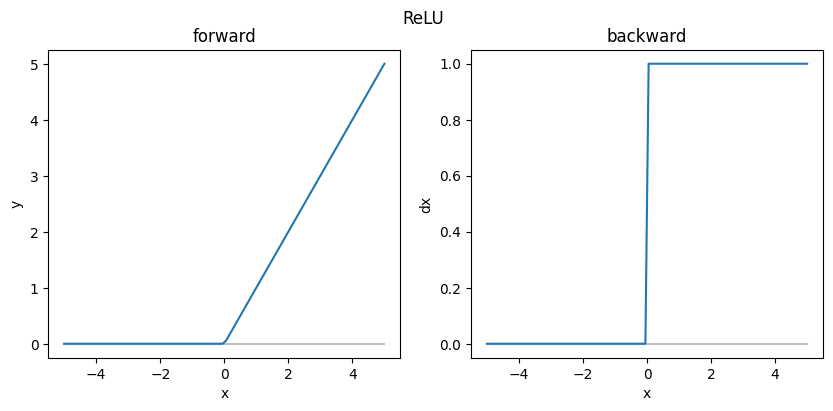

In [3]:
# Create activation.
relu = ReLU()

# Plot function for some values.
show_activation(relu, val_range=(-5,5))

<br>

### 2 Sigmoid (7 Points)

---

The sigmoid activation function is defined as $\sigma: \mathbb{R} \to \mathbb{R}$ with

<br>

$$
    \sigma(x) = \frac{1}{1 + e^{-x}}.
$$

<br>

It has the property that the output is in the range $(0,1)$, such that it can be interpreted as a probability.

<br>

### 2.1 Derivative (5 Points)

---

Show that the derivative of the sigmoid function is given by

$$
    \frac{\text{d}}{\text{d}x}\sigma(x) = \sigma(x)(1-\sigma(x).
$$

<br>

##### Proof

*Write your proof here.*

\begin{aligned}
\frac{d}{dx} \sigma(x) &= \frac{d}{dx} \left[  \frac{1}{1+e^{-x}} \right] \\
&=\frac{d}{dx}(1+e^{-x})^{-1} \\
&=-1*(1+e^{-x})^{-2}(-e^{-x}) \\
&=\frac{-e^{-x}}{-(1+e^{-x})^{2}} \\
&=\frac{e^{-x}}{(1+e^{-x})^{2}} \\
&=\underbrace{\frac{1}{1+e^{-x}}}_{\sigma(x)}  \frac{e^{-x}}{1+e^{-x}} \\
&=\frac{1}{1+e^{-x}}  \frac{e^{-x} + (1 - 1)}{1+e^{-x}} \\
&=\frac{1}{1+e^{-x}}  \frac{(1 + e^{-x}) - 1}{1+e^{-x}} \\
&=\frac{1}{1+e^{-x}}  \left[ \frac{(1 + e^{-x})}{1+e^{-x}} - \frac{1}{1+e^{-x}} \right] \\
&=\frac{1}{1+e^{-x}}  \left[ 1 - \underbrace{\frac{1}{1+e^{-x}}}_{\sigma(x)} \right] \\
&=\sigma(x) (1-\sigma(x)) \\
\end{aligned}

<br>

### 2.2 Implementation (2 Points)

---

Complete the definition of the `Sigmoid` class in the `modules/activation.py` file.

In the `forward` method, apply the sigmoid activation function to the input componentwise and store the result in the `out` variable that is returned from the method. Save the computed outputs for gradient computation in the backward pass.

In the `backward` method, compute the gradient of the loss with respect to the inputs. The method receives the gradient of the loss with respect to the layer outputs. Store the gradient of the loss with respect to the layer inputs in the `in_grad` variable that is returned from the method.

Your implementation should be fully vectorized, that is, no loops are allowed.

<br>

#### 2.2.1 Test

To test your implementation you can run the following code cell.

In [4]:
Sigmoid_test()

True

#### 2.2.2 Graph

Let's also have a look at the graph of the function.

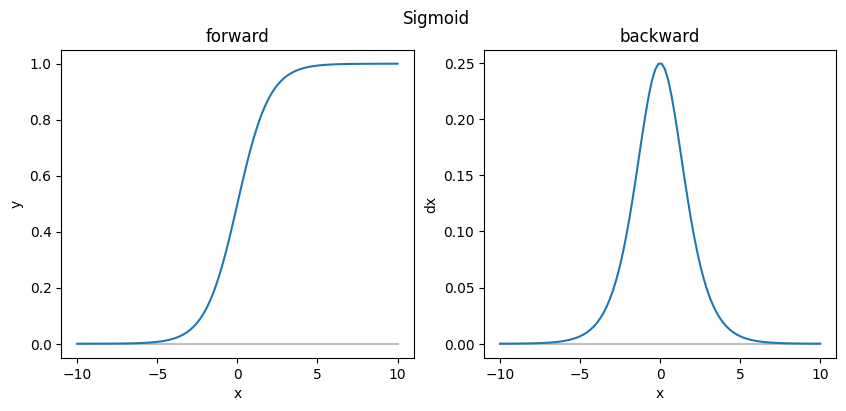

In [5]:
# Create activation
sig = Sigmoid()

# Plot function for some values.
show_activation(sig, val_range=(-10,10))

<br>

### 3 Hyperbolic Tangent (1 Point)

---

The hyperbolic tangent (tanh) activation function is defined as $\tanh: \mathbb{R} \to \mathbb{R}$ with

<br>

$$
    \tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}.
$$

<br>

The tanh activation function maps values into the range $(-1, 1)$.

The derivative of the tanh function is given by

$$
    \frac{\text{d}}{\text{d}x}\tanh(x) = 1 - \tanh(x)^2.
$$

<br>

### 3.1 Implementation

---

Complete the definition of the `Tanh` class in the `modules/activation.py` file.

In the `forward` method, apply the tanh activation function to the input componentwise and store the result in the `out` variable that is returned from the method. Save the computed outputs for gradient computation in the backward pass.

In the `backward` method, compute the gradient of the loss with respect to the inputs. The method receives the gradient of the loss with respect to the layer outputs. Store the gradient of the loss with respect to the layer inputs in the `in_grad` variable that is returned from the method.

Your implementation should be fully vectorized, that is, no loops are allowed.

<br>

#### 3.1.1 Test

To test your implementation you can run the following code cell.

In [6]:
Tanh_test()

True

#### 3.1.2 Graph

Let's also have a look at the graph of the function.

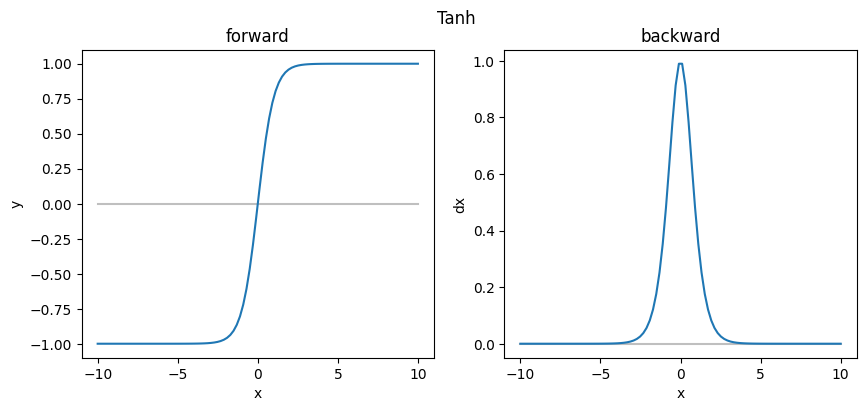

In [7]:
# Create activation
tanh = Tanh()

# Plot function for some values.
show_activation(tanh, val_range=(-10,10))

<br>

### 4 Saturating Nonlinearities (5 Points)

---

If you implemented the sigmoid and tanh functions correctly, you should be able to observe how both functions become saturated for inputs that are farther away from zero in both directions. Give a concise description of the problems that can be caused by this behavior when using these functions as activations in neural networks.

<br>

##### Answer

*Write your answer here.*

If we use sigmoid or tanh as activation functions we have to deal with the problem that the derivatives can get extremly small. This phenomen is known as the Vanishing Gradient Problem. It means that the gradient gets so small that a computer with its restricted number representation space is not able to handle these small values. The gradient is so small that the computer will represent it with a zero value. The consequence of the gradient set to zero is that the learning process will stop, because the weights will not change at each iteration if the gradient is zero.

<br>